In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
from datetime import datetime
from pathlib import Path
import importlib
import time
import warnings
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import ruta_vp
import transportista_cd
import files_management as fm
import send_reports_through_wssp as srtw
import print_management as pm

### Banner

In [6]:
# import pyfiglet
# print(pyfiglet.figlet_format("Rechazos WSSP"))

banner = r"""
 ____           _                         __        ______ ____  ____
|  _ \ ___  ___| |__   __ _ _______  ___  \ \      / / ___/ ___||  _ \
| |_) / _ \/ __| '_ \ / _` |_  / _ \/ __|  \ \ /\ / /\___ \___ \| |_) |
|  _ <  __/ (__| | | | (_| |/ / (_) \__ \   \ V  V /  ___) |__) |  __/
|_| \_\___|\___|_| |_|\__,_/___\___/|___/    \_/\_/  |____/____/|_|

          💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥
"""

print(banner, end='\n\n')
time.sleep(1)


 ____           _                         __        ______ ____  ____
|  _ \ ___  ___| |__   __ _ _______  ___  \ \      / / ___/ ___||  _ \
| |_) / _ \/ __| '_ \ / _` |_  / _ \/ __|  \ \ /\ / /\___ \___ \| |_) |
|  _ <  __/ (__| | | | (_| |/ / (_) \__ \   \ V  V /  ___) |__) |  __/
|_| \_\___|\___|_| |_|\__,_/___\___/|___/    \_/\_/  |____/____/|_|

          💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥




### Configuracion

In [7]:
# Diccionarios
parse_locaciones = {
    '06 AYA EL PEDREGAL': 'Pedregal',
    '38 AYA ATICO': 'Atico',
    '40 AYA CHALA': 'Chala',
    '88 AYA CAMANA': 'Camana'
}
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
transportista = {
    "name": "transportista",
    "file_name": "Cf_programadas_por_transportista.csv",    # Nombre del archivo local
    "date": "Fecha",
    "transportista": "Código de Transportista",
    "relevant_columns": [
        'Locación', 
        'Transportista',
        'Fecha',
        'Carga Total CF',
        'Carga Pvta CF',
        'Rechazo CF',        
        'Orden de Carga',
        'Código de Transportista'
    ],
    "reports": [ # sobre 'Carga Pvta CF'
        'Transportista',
    ]
}
ruta = {
    "name": "ruta",
    "file_name": "Cf_rech_por_ruta.csv",                    # Nombre del archivo local
    "date": "Día",
    "transportista": "Código Transportista",
    "relevant_columns": [
        'Locación',
        'Ruta Troncal Dinámico',
        'Motivo de anulación',
        'Día',
        'Venta Perdida CF',
        'Cliente',
        'Transportista',
        'Nombre Vendedor',
        'Número de orden de carga',
        'Código Transportista'
    ],
    "reports": [ # sobre 'Venta Perdida CF'
        'Motivo de anulación',
        'Transportista',
        'Ruta Troncal Dinámico',        
    ]
}

# Listas
locaciones = ['06 AYA EL PEDREGAL', '38 AYA ATICO', '40 AYA CHALA', '88 AYA CAMANA']

# Constantes
root_address = r'C:\Informacion\rechazos'
project_address = r"C:\Informacion\rechazos\Analisis\automatizacion_reporte_rechazos_wssp"
output_file_name = "output_file.csv"

### Seleccionar documento a procesar

In [8]:
importlib.reload(fm)

print("\nSeleccione fuente de datos:")
print("  [1] Ruta")
print("  [2] Transportista\n")

opcion_fuente = int(input(">> Opción (1 o 2): "))

if opcion_fuente == 1:
    df = fm.file_processing(
        ruta, 
        output_file_name, 
        locaciones,
        project_address
    )
else:
    df = fm.file_processing(
        transportista, 
        output_file_name, 
        locaciones,
        project_address
    )


Seleccione fuente de datos:
  [1] Ruta
  [2] Transportista



### Procesamiento de documentos

Parseo de fecha

In [9]:
# Parsear la fecha para su filtrado
importlib.reload(ruta_vp)
importlib.reload(transportista_cd)

if opcion_fuente == 1:
    df = ruta_vp.parse_date(
        ruta, 
        df, 
    )
else:
    df = transportista_cd.parse_date(
        transportista, 
        df, 
    )

Filtrado por tiempo

In [10]:
importlib.reload(fm)

''' ESCOGER QUE TIPO DE ANALISIS HACER
(1) Por Año (Escoger el año especifico) (Analisis de todo ese año)
(2) Por Mes (Escoger el mes especifico) (Analisis de todo ese mes)
(3) Por Día (Escoger el día especifico) (Analisis de todo ese día)
(4) Intervalo (Escoger fecha de inicio y fecha de fin especificas) (Analisis de todo el intervalo considerando las fechas ingresadas)
(5) Mayor igual que (Escoger fecha de inicio) (Analisis considerando esa fecha hasta el ultimo registro existente)
'''

# Seleccionar la opcion_tiempo de análisis por tiempo
print("\nSelecciona filtro de tiempo:")
print("  [1] Año")
print("  [2] Mes")
print("  [3] Día")
print("  [4] Intervalo")
print("  [5] Mayor o igual que\n")

time_option = int(input(">> Opción (1 - 5): "))

if opcion_fuente == 1:
    df, date = fm.get_specific_date(
        df,
        ruta,
        time_option
    )
else:
    df, date = fm.get_specific_date(
        df,
        transportista,
        time_option
    )


Selecciona filtro de tiempo:
  [1] Año
  [2] Mes
  [3] Día
  [4] Intervalo
  [5] Mayor o igual que



Filtrado por locacion

In [11]:
importlib.reload(fm)
importlib.reload(pm)

# Seleccionar locaciones
print("\nSelecciona filtro de locacion:")
print(f"  [1] Todas")
print(f"  [2] {locaciones[0]}")
print(f"  [3] {locaciones[1]}")
print(f"  [4] {locaciones[2]}")
print(f"  [5] {locaciones[3]}\n")

location_option = int(input(">> Opción (1 - 5): "))

df = fm.get_specific_location(df, location_option, locaciones)

pm.show_df(df)


Selecciona filtro de locacion:
  [1] Todas
  [2] 06 AYA EL PEDREGAL
  [3] 38 AYA ATICO
  [4] 40 AYA CHALA
  [5] 88 AYA CAMANA


📊 Resumen de DataFrame:
Locación             object
Ruta Troncal Dinámico object
Motivo de anulación  object
Día                  datetime64[ns]
Venta Perdida CF     float64
Cliente              object
Transportista        object
Nombre Vendedor      object
Número de orden de carga float64
Código Transportista object

🔢 Dimensión: 152 filas × 10 columnas
💾 Memoria usada: 72.50 KB



### Reportes Ruta o Transportista

╒══════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Campo            │ Valor                                                                                                                                                                │
╞══════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ name             │ ruta                                                                                                                                                                 │
├──────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ file_name        │ Cf_rech_por_ruta.csv                   

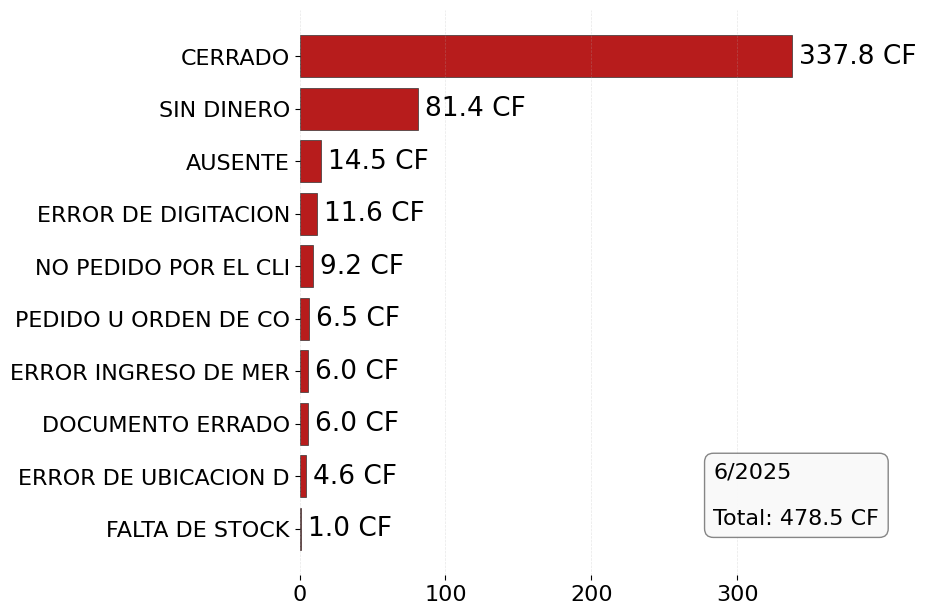

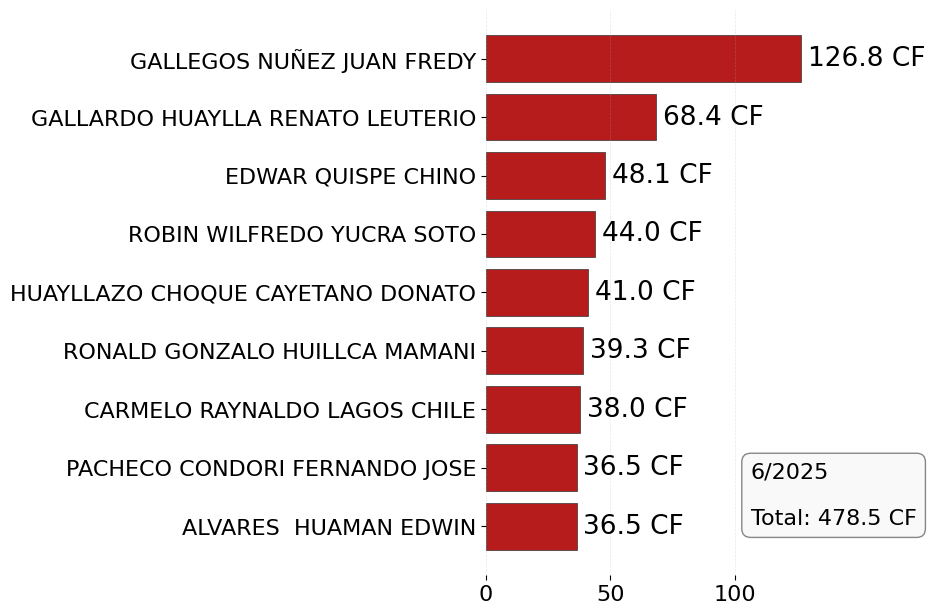

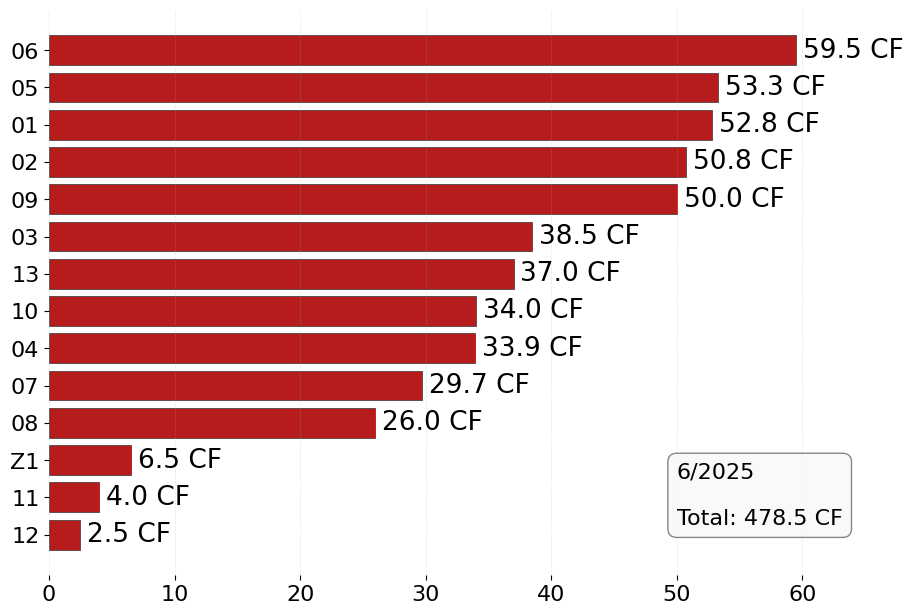

In [20]:
importlib.reload(ruta_vp)
importlib.reload(transportista_cd)

if opcion_fuente == 1:
    ruta_vp.main(
        project_address,
        df,
        ruta,
        date
    )
    pm.show_document(ruta)
else:
    transportista_cd.main(
        project_address,
        df,
        transportista,
        date
    )
    pm.show_document(transportista)

### Envio de Reporte

In [ ]:
importlib.reload(srtw)

# Envio de reportes a grupo de wssp
def send_reports(group_option):
    WSSP_CONFIF = {
        'page_url': 'https://web.whatsapp.com',
        'group_names': ['PEDREGAL - DISTRIBUCIÓN'] if group_option == 1 else ['GrupoPrueba - ón'],
    }

    srtw.main(project_address, WSSP_CONFIF)

# 🔁 Bucle de confirmación
while True:
    # Seleccionar grupo de wssp
    print("\nSelecciona grupo de wssp:")
    print("  [1] Grupo Oficial")
    print("  [2] Grupo de Prueba")
    print("  [3] Terminar proceso")

    group_option = int(input(">> Opción (1 - 3): "))

    if group_option == 3 or group_option > 2:
        print("\n[✓] Proceso finalizado.\n")
        break  # salir del bucle
    else:        
        send_reports(group_option)

### Limpiar carpeta

In [ ]:
carpeta = Path(project_address)
#print(list(carpeta.glob('*.png')))

# Eliminar archivos .png
for imagen in carpeta.glob('*.png'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminando: {imagen}')

[WindowsPath('c:/Informacion/rechazos/Analisis/automatizacion_reporte_rechazos_wssp/barh_Motivo de anulación_Venta Perdida CF.png'), WindowsPath('c:/Informacion/rechazos/Analisis/automatizacion_reporte_rechazos_wssp/barh_Ruta Troncal Dinámico_Venta Perdida CF.png'), WindowsPath('c:/Informacion/rechazos/Analisis/automatizacion_reporte_rechazos_wssp/barh_Transportista_Venta Perdida CF.png')]
Eliminado: c:\Informacion\rechazos\Analisis\automatizacion_reporte_rechazos_wssp\barh_Motivo de anulación_Venta Perdida CF.png
Eliminado: c:\Informacion\rechazos\Analisis\automatizacion_reporte_rechazos_wssp\barh_Ruta Troncal Dinámico_Venta Perdida CF.png
Eliminado: c:\Informacion\rechazos\Analisis\automatizacion_reporte_rechazos_wssp\barh_Transportista_Venta Perdida CF.png


### ANALISIS

In [100]:
# Patrones


### Export it as .py

In [21]:
import nbformat
from nbconvert import PythonExporter

# Cargar el notebook
notebook_path = "main.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Eliminar la última celda
nb['cells'] = nb['cells'][:-1]

# Convertir a script .py
exporter = PythonExporter()
codigo_python, _ = exporter.from_notebook_node(nb)

# Guardar el archivo .py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_python)

print("✅ Archivo .py creado sin la última celda.")

✅ Archivo .py creado sin la última celda.
